In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

az.style.use("arviz-darkgrid")
np.random.seed(0)

script_dir = os.path.dirname('review.ipynb')

/Users/tueno/.pyenv/versions/3.11.0/envs/bayesian-modeling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
# どちらのレビューが信用できるか？
# 1~5までの5段階評価を行う
# 商品Aは19人のレビューを集めその平均は5
# 商品Bは2280人のレビューを集めその平均は4.6
# 事前分布は一様分布，尤度関数を正規分布と仮定する

N_A = 19  # 商品Aのレビュー数
mu_A = 5  # 商品Aのレビュー平均
N_B = 2280  # 商品Bのレビュー数
mu_B = 4.6  # 商品Bのレビュー平均

file_path = os.path.join(script_dir, 'rev_model.stan')

data = {'N_A': N_A, 'N_B': N_B, 'mu_A': mu_A, 'mu_B': mu_B}
model = CmdStanModel(stan_file=file_path)


fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

03:56:19 - cmdstanpy - INFO - compiling stan file /Users/tueno/Documents/master/master-thesis/coding-exercises/rev_model.stan to exe file /Users/tueno/Documents/master/master-thesis/coding-exercises/rev_model
03:56:24 - cmdstanpy - INFO - compiled model executable: /Users/tueno/Documents/master/master-thesis/coding-exercises/rev_model
03:56:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       


03:56:25 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmprn6obsb4/rev_modelhwc0trg4/rev_model-20230618035624_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmprn6obsb4/rev_modelhwc0trg4/rev_model-20230618035624_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



array([<Axes: title={'center': 'mu_A_hat'}>,
       <Axes: title={'center': 'mu_B_hat'}>], dtype=object)

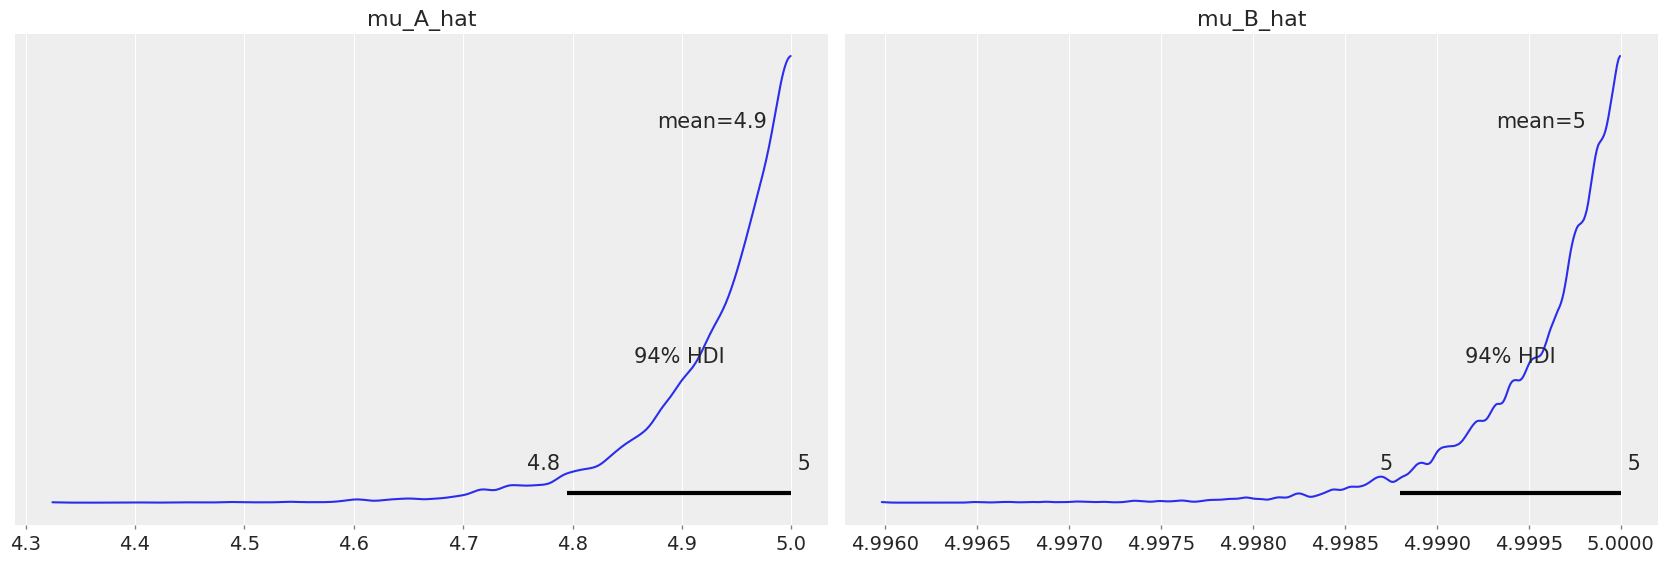

In [23]:
# 事後分布の可視化
az.plot_posterior(cmdstanpy_data)

In [24]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-2.587920e+06,0.065163,3.710180,-2.587930e+06,-2.587920e+06,-2.587920e+06,3241.78,19528.8,1.000320
mu_A_hat,4.927970e+00,0.000857,0.071885,4.783280e+00,4.950420e+00,4.996230e+00,7034.23,42374.9,0.999995
mu_B_hat,4.999570e+00,0.000006,0.000436,4.998710e+00,4.999710e+00,4.999980e+00,5741.71,34588.6,1.000380


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

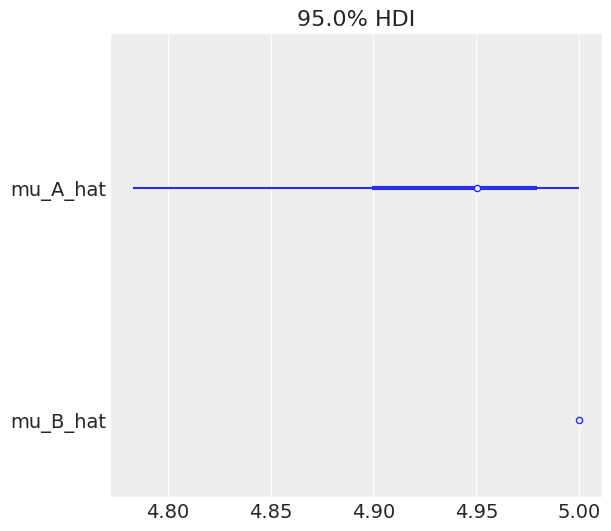

In [27]:
az.plot_forest(cmdstanpy_data.posterior, combined=True, hdi_prob=0.95)

In [31]:
# 商品Bが商品Aよりも高いレビューを持つ確率

mu_A_hat = fit.stan_variable('mu_A_hat')
mu_B_hat = fit.stan_variable('mu_B_hat')

print((mu_B_hat - mu_A_hat > 0).mean())

0.9945
